<a href="https://colab.research.google.com/github/gaurisharma360/intensityofepilepsy/blob/main/Intensity_of_Epilepsy_using_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

**Multiple Linear Regression**

In [3]:
data_df=pd.read_csv("/content/Minorv2.csv")

In [4]:
data_df.head()

,"Treatment (0=Placebo, 1=Progabide)",Age,Difference in frequencies,Intensity of disease
0,0,31,0.375,4
1,0,30,0.375,4
2,0,25,0.625,4
3,0,36,0.625,4
4,0,22,-1.375,2


In [5]:

x=data_df.drop([('Intensity of disease')],axis=1).values
y=data_df['Intensity of disease'].values

In [6]:
print(x)

[[ 0.    31.     0.375]
 [ 0.    30.     0.375]
 [ 0.    25.     0.625]
 [ 0.    36.     0.625]
 [ 0.    22.    -1.375]
 [ 0.    29.    -0.625]
 [ 0.    31.     0.   ]
 [ 0.    36.     5.375]
 [ 0.    37.    -0.125]
 [ 0.    28.     2.875]
 [ 0.    36.     1.75 ]
 [ 0.    24.    -0.25 ]
 [ 0.    28.    -0.25 ]
 [ 0.    36.     0.   ]
 [ 0.    26.    -3.5  ]
 [ 0.    26.    -4.25 ]
 [ 0.    28.    -1.5  ]
 [ 0.    31.     1.5  ]
 [ 0.    32.    -0.375]
 [ 0.    21.    -0.5  ]
 [ 0.    29.     0.25 ]
 [ 0.    21.     0.625]
 [ 0.    32.    -0.5  ]
 [ 0.    25.     0.25 ]
 [ 0.    30.    11.   ]
 [ 0.    40.    -0.375]
 [ 0.    19.     0.   ]
 [ 0.    22.     0.75 ]
 [ 1.    18.    -4.25 ]
 [ 1.    32.    -1.25 ]
 [ 1.    20.    -1.5  ]
 [ 1.    20.     0.375]
 [ 1.    18.     0.   ]
 [ 1.    24.    -1.625]
 [ 1.    30.     5.375]
 [ 1.    35.     0.75 ]
 [ 1.    57.    -0.125]
 [ 1.    20.    -5.375]
 [ 1.    22.    -1.5  ]
 [ 1.    28.    -0.375]
 [ 1.    23.    -2.   ]
 [ 1.    40.    

In [7]:
print(y)

[4 4 4 4 2 3 4 6 3 5 5 3 3 4 1 1 2 5 3 3 4 4 3 4 7 3 4 4 6 2 2 4 4 2 6 3 3
 1 2 3 2 3 5 2 4 4 3 3 7 2 2 2 4 2 3 6 2 2 3]


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=ml.predict(x_test)
print(y_pred)

[3.64897148 3.34576147 4.74408632 3.5764498  3.19162532 2.87289022
 2.76485826 3.49676603 2.86662878 3.44693154 2.88065276 3.75700343
 3.3485911  3.22803626 3.54750118 3.97396801 3.5406393  3.0789624 ]


In [11]:
ml.predict([[0,31,0.375]])

array([3.64897148])

In [12]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
errors

0.6969746112347806

In [13]:
from sklearn.metrics import r2_score
m1=r2_score(y_test,y_pred)
print(m1)

0.5687927418610875


In [14]:
ms1=mean_squared_error(y_test,y_pred)
rms1 = sqrt(ms1)

print("Mean Squared Error is",ms1)
print("Root Mean Squared Error is",rms1)

Mean Squared Error is 0.48577360870587355
Root Mean Squared Error is 0.6969746112347806


Text(0.5, 1.0, 'Actual vs Predicted in Multiple Linear Regression')

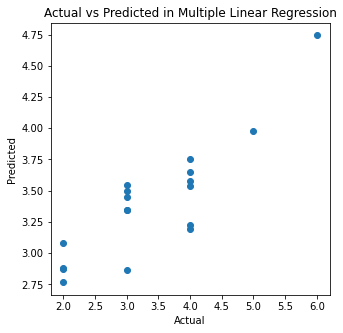

In [79]:

plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted in Multiple Linear Regression')

In [16]:
#cannot be performed here
#from sklearn.metrics import classification_report,confusion_matrix
#print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

**Multinomial Logistic Regression**

In [17]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [18]:
y_train

array([3, 3, 2, 2, 4, 6, 1, 5, 4, 4, 2, 7, 2, 2, 3, 3, 4, 4, 2, 1, 2, 2,
       4, 4, 4, 3, 3, 3, 4, 7, 5, 3, 3, 3, 4, 6, 5, 1, 6, 2, 2])

In [19]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ],
       [ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375]])

In [20]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3, 3, 2, 4, 3, 4, 3, 5, 4, 2])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [22]:
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",random_state=42)

In [23]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=42)

In [24]:
y_predlr=lr.predict(x_test)

In [25]:
#lr.score(x_test,y_test)

In [26]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_predlr))  
m2=metrics.accuracy_score(y_test, y_predlr)

Accuracy Score: 0.4444444444444444


In [27]:
ms2=mean_squared_error(y_test,y_predlr)
rms2 = sqrt(ms2)
print("Mean Squared Error is",ms2)
print("Root Mean Squared Error is",rms2)

Mean Squared Error is 0.7222222222222222
Root Mean Squared Error is 0.8498365855987975


In [28]:
class_report=classification_report(y_test, y_predlr)
print(class_report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.42      0.83      0.56         6
           4       0.50      0.33      0.40         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.44        18
   macro avg       0.38      0.43      0.39        18
weighted avg       0.36      0.44      0.37        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted in Multinomial Logistic Regression')

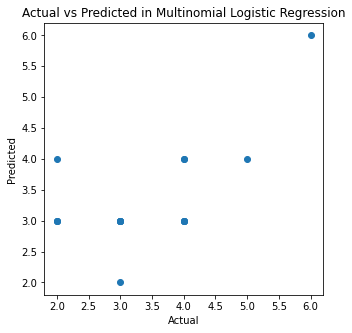

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_predlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted in Multinomial Logistic Regression')

In [30]:
#applying standardisation
#scaler=StandardScaler()

In [31]:
#x_train_s=scaler.fit_transform(x_train)
#x_test_s=scaler.transform(x_test)

In [32]:
#lr.fit(x_train,y_train)

In [33]:
#y_predlr2=lr.predict(x_test_s)

In [34]:
#lr.score(x_test_s,y_test)

**Naive Bayes**

In [35]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [36]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()

In [37]:
nv=modelnb.fit(x_train,y_train)

In [38]:
y_nv=nv.predict(x_test)

In [39]:
modelnb.score(x_test,y_test)

0.7222222222222222

In [40]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_nv))  
m3=metrics.accuracy_score(y_test, y_nv)

Accuracy Score: 0.7222222222222222


In [41]:
ms3=mean_squared_error(y_test,y_nv)
rms3 = sqrt(ms3)
print("Mean Squared Error is",ms3)
print("Root Mean Squared Error is",rms3)

Mean Squared Error is 0.2777777777777778
Root Mean Squared Error is 0.5270462766947299


In [42]:
class_report=classification_report(y_test, y_nv)
print(class_report)

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.62      0.83      0.71         6
           4       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.72        18
   macro avg       0.64      0.67      0.64        18
weighted avg       0.69      0.72      0.69        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ],
       [ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375]])

In [44]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3, 3, 2, 4, 3, 4, 3, 5, 4, 2])

In [45]:
modelnb.predict(x_test)

array([4, 3, 6, 3, 3, 2, 2, 3, 2, 3, 2, 4, 3, 4, 3, 4, 3, 2])

Text(0.5, 1.0, 'Actual vs Predicted using Naive Bayes')

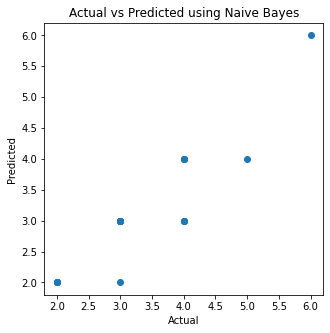

In [81]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_nv)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using Naive Bayes')

**K-Nearest Neighbours(KNN algorithm)**

In [46]:
#Scaling imp here else 0.33
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_trainsc=scaler.transform(x_train)
x_testsc=scaler.transform(x_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_trainsc,y_train)

KNeighborsClassifier()

In [48]:
classifier.score(x_testsc,y_test)


0.3333333333333333

In [49]:
y_predknn=classifier.predict(x_testsc)

In [50]:
m4=metrics.accuracy_score(y_test, y_predknn)
m4

0.3333333333333333

In [51]:
ms4=mean_squared_error(y_test,y_predknn)
rms4 = sqrt(ms4)
print("Mean Squared Error is",ms4)
print("Root Mean Squared Error is",rms4)

Mean Squared Error is 1.7777777777777777
Root Mean Squared Error is 1.3333333333333333


In [52]:

print(classification_report(y_test,y_predknn))
print(confusion_matrix(y_test,y_predknn))

              precision    recall  f1-score   support

           2       0.40      0.50      0.44         4
           3       0.36      0.67      0.47         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.33        18
   macro avg       0.15      0.23      0.18        18
weighted avg       0.21      0.33      0.26        18

[[2 1 1 0 0]
 [1 4 1 0 0]
 [2 4 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted using KNN')

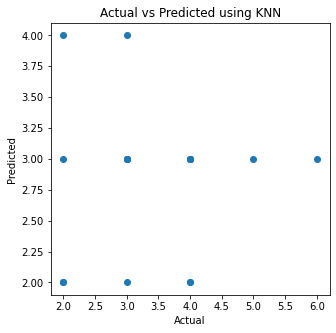

In [82]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_predknn)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using KNN')

**Decision Tree**

In [53]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [54]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
#importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
#creating decision tree function
dt=DecisionTreeClassifier(random_state=42)

In [57]:
#fitting model
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
#checking training score
dt.score(x_train,y_train)

1.0

In [59]:
#checking testing score
y_preddt=dt.predict(x_test)

In [60]:
from sklearn import metrics
m5=metrics.accuracy_score(y_test,y_preddt)
metrics.accuracy_score(y_test,y_preddt)


0.7777777777777778

In [61]:
ms5=mean_squared_error(y_test,y_preddt)
rms5 = sqrt(ms5)
print("Mean Squared Error is",ms5)
print("Root Mean Squared Error is",rms5)

Mean Squared Error is 0.2222222222222222
Root Mean Squared Error is 0.4714045207910317


In [62]:
print(classification_report(y_test,y_preddt))

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       1.00      0.83      0.91         6
           4       0.80      0.67      0.73         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.78        18
   macro avg       0.72      0.70      0.71        18
weighted avg       0.83      0.78      0.80        18



Text(0.5, 1.0, 'Actual vs Predicted using Decision Tree')

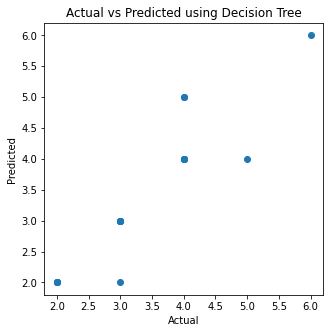

In [83]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_preddt)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using Decision Tree')

**Random Forest**

In [63]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [65]:
rf.predict(x_test)

array([4, 3, 6, 3, 4, 2, 2, 3, 2, 3, 2, 4, 3, 4, 3, 4, 4, 2])

In [66]:
y_predrf=rf.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score,classification_report
m6=accuracy_score(y_test,y_predrf)
accuracy_score(y_test,y_predrf)


0.8333333333333334

In [68]:
ms6=mean_squared_error(y_test,y_predrf)
rms6 = sqrt(ms6)
print("Mean Squared Error is",ms6)
print("Root Mean Squared Error is",rms6)

Mean Squared Error is 0.16666666666666666
Root Mean Squared Error is 0.408248290463863


In [69]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.83      0.83      0.83         6
           4       0.83      0.83      0.83         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.83        18
   macro avg       0.69      0.73      0.71        18
weighted avg       0.79      0.83      0.81        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted using Random Forest')

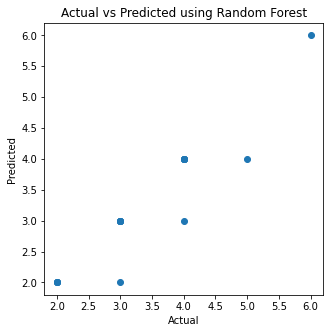

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_predrf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using Random Forest')

**SGD** 

In [70]:
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
#scaled
scaler = preprocessing.StandardScaler()
sgdx_train = scaler.fit_transform(x_train)
sgdx_test = scaler.transform(x_test)

In [71]:
sgdc=SGDClassifier(max_iter=1000)
print(sgdc)

SGDClassifier()


In [72]:
sgdc.fit(sgdx_train,y_train)

SGDClassifier()

In [73]:
score = sgdc.score(sgdx_train, y_train)
print("Training score: ", score) 
 



Training score:  0.5365853658536586


In [74]:
sgdypred = sgdc.predict(sgdx_test)

In [75]:
m7=accuracy_score(y_test,sgdypred)
accuracy_score(y_test,sgdypred)

0.2777777777777778

In [100]:
ms7=mean_squared_error(y_test,sgdypred)
rms7 = sqrt(ms8)
print("Mean Squared Error is",ms8)
print("Root Mean Squared Error is",rms8)

Mean Squared Error is 1.8888888888888888
Root Mean Squared Error is 1.3743685418725535


In [77]:
cr = classification_report(y_test, sgdypred)
print(cr)

              precision    recall  f1-score   support

           2       0.50      0.75      0.60         4
           3       0.00      0.00      0.00         6
           4       0.29      0.33      0.31         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.28        18
   macro avg       0.16      0.22      0.18        18
weighted avg       0.21      0.28      0.24        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted using SGD')

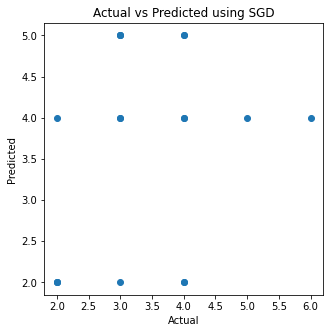

In [86]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,sgdypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using SGD')

**PLOT**

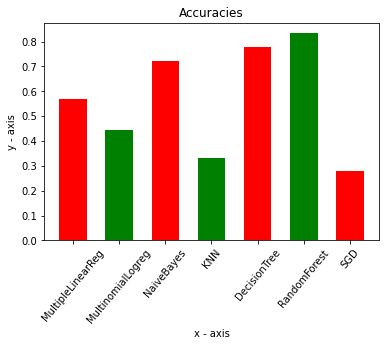

In [99]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [m1, m2, m3, m4, m5, m6, m7] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'green'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Accuracies')

# function to show the plot
plt.show()

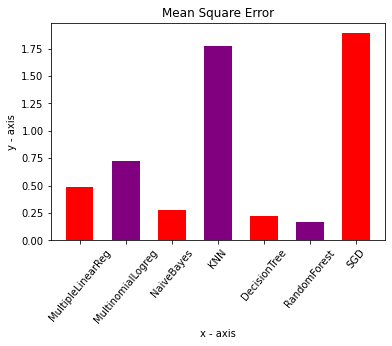

In [105]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [ms1, ms2, ms3, ms4, ms5, ms6, ms7] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'purple'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title("Mean Square Error")

# function to show the plot
plt.show()

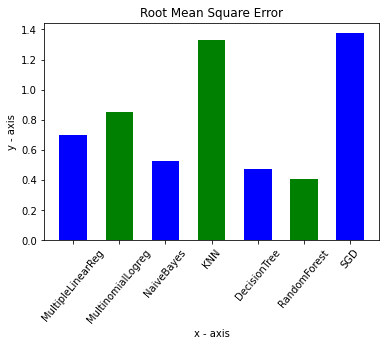

In [103]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [rms1, rms2, rms3, rms4, rms5, rms6, rms7] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['blue', 'green'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title("Root Mean Square Error")

# function to show the plot
plt.show()